# ML Data Cleaning & Feature Selection using Telecom Client Churn Dataset

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

What are the data types? (Only numeric and categorical)

Are there missing values?

What are the likely distributions of the numeric variables?

Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

Which independent variables have missing data? How much?

Do the training and test sets have the same data?

In the predictor variables independent of all the other predictor variables?

Which predictor variables are the most important?

Do the ranges of the predictor variables make sense?

What are the distributions of the predictor variables?

Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

# EDA for Client churn rate in Telecom sector

### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."
### Content
The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models. Two datasets are made available here: The churn-80 and churn-20 datasets can be downloaded.<br><br>
The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML models, let's use the larger set (that is, churn-80) for training and cross-validation purposes, and the smaller set (that is, churn-20) for final testing and model performance evaluation.

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [137]:
#Reading the Telecom client churn dataset
data = pd.read_csv("telecom_churn.csv")

In [138]:
#Viewing Data in the file
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [139]:
#Viewing last few rows in file
data.tail()

State  Account length  Area code International plan Voice mail plan  \
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
3328                 9.9                 6               2.67   
3329                 9.6                 4               2.59   
3330                14.1                 6               3.81   
3331                 5.0                10               1.35   
3332                13.7                 4               3.70   

      Customer service calls  Churn  
3328                       2  False  
3329                       3  False  
3330                       2  False  
3331                       2  False  
3332                       0  False

### Dataset Information
Each row represents a customer; each column contains customer’s attributes. It's columns are shown in the cell below:<br>

In [140]:
#To check all the columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

There are 16 numeric features, 1 boolean and 3 object features.

In [141]:
#Checking if any data is missing
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

No Missing Data from any column, which means we need not to impute null values from the dataset

False    2850
True      483
Name: Churn, dtype: int64

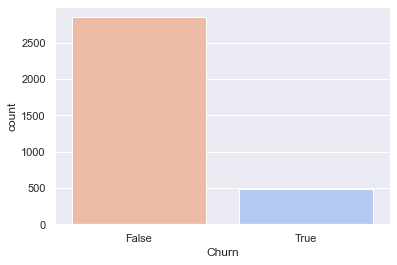

In [142]:
# checking total number of churn users in dataset
sns.countplot(x='Churn', data=data, palette='coolwarm_r')
data['Churn'].value_counts()

In [143]:
#changing our Main prediction (dependent) variable "Churn" from Bool to Int type for detailed Statistical results
data['Churn'] = data['Churn'].astype('int64')

In [144]:
#To get statistical results like count, mean, std, quartiles and many more from the dataset
#we use the descsribe() function.
data.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls        Churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

In [145]:
print("#Now we gonna separate our training and testing data in 80:20 ratio.")
training_data = data.sample(frac=0.8)
testing_data = data.drop(training_data.index)
print(f"No. of training samples: {training_data.shape[0]}")
print(f"No. of testing samples: {testing_data.shape[0]}")

#Now we gonna separate our training and testing data in 80:20 ratio.
No. of training samples: 2666
No. of testing samples: 667


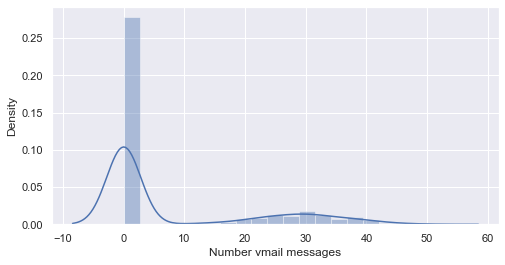

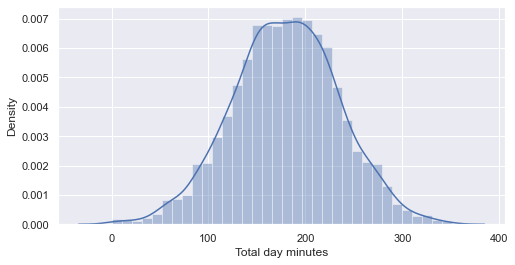

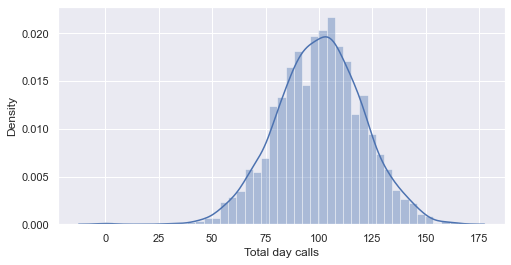

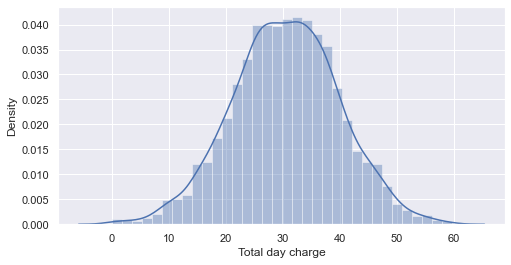

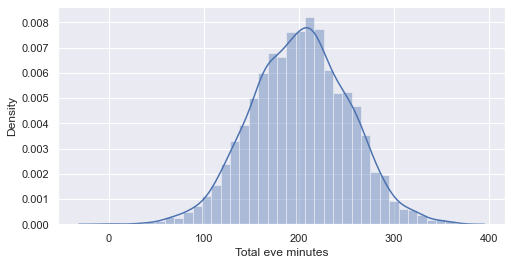

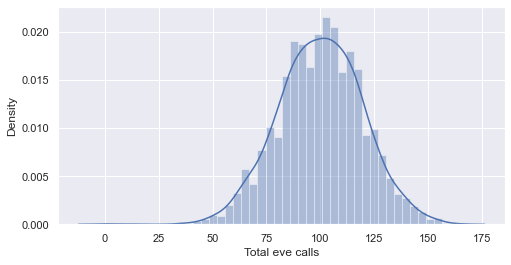

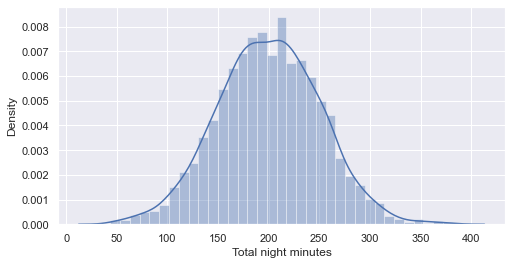

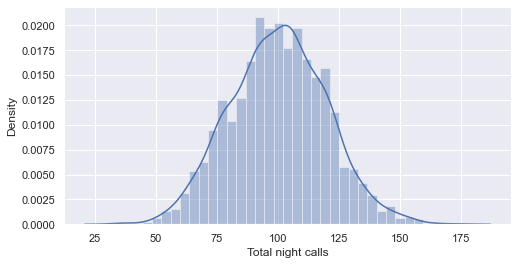

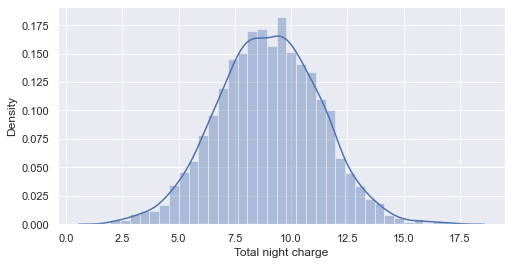

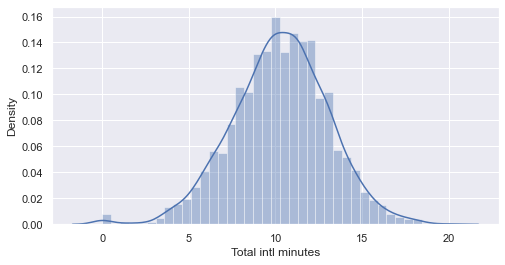

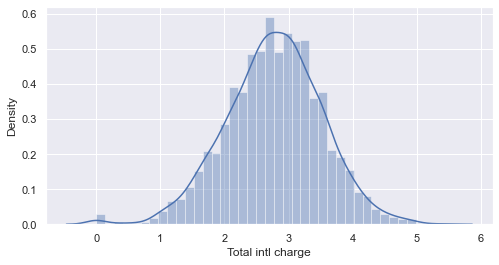

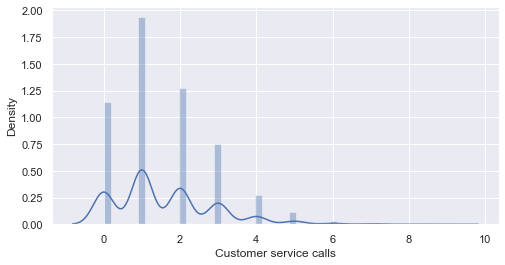

In [146]:
#Checking the distribution of Independent variables
field_names = training_data[[
    'Number vmail messages',
    'Total day minutes', 
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total night minutes',
    'Total night calls',
    'Total night charge',
    'Total intl minutes',
    'Total intl charge',
    'Customer service calls',
]]

for column in field_names.columns:
    sns.set(rc={"figure.figsize": (8, 4)});
    sns.distplot(training_data[column])
    plt.show()


<AxesSubplot:>

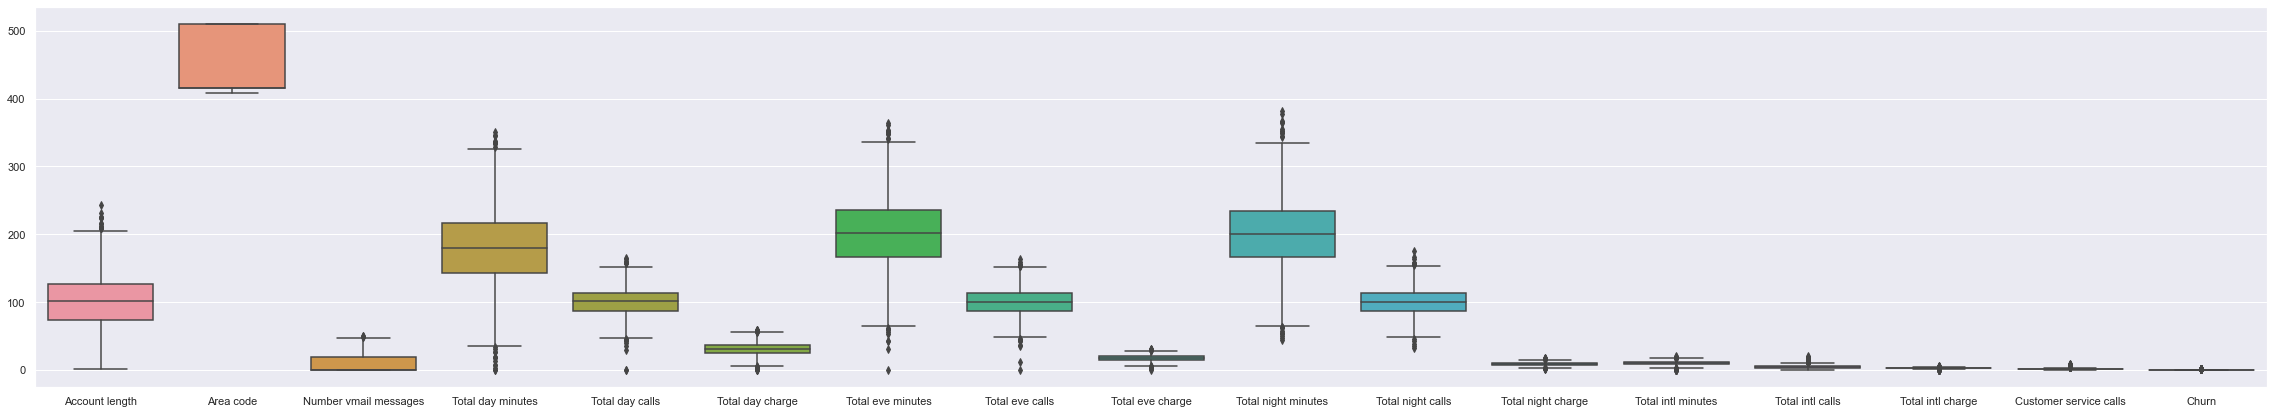

In [147]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(40,7))
sns.boxplot(data=training_data)

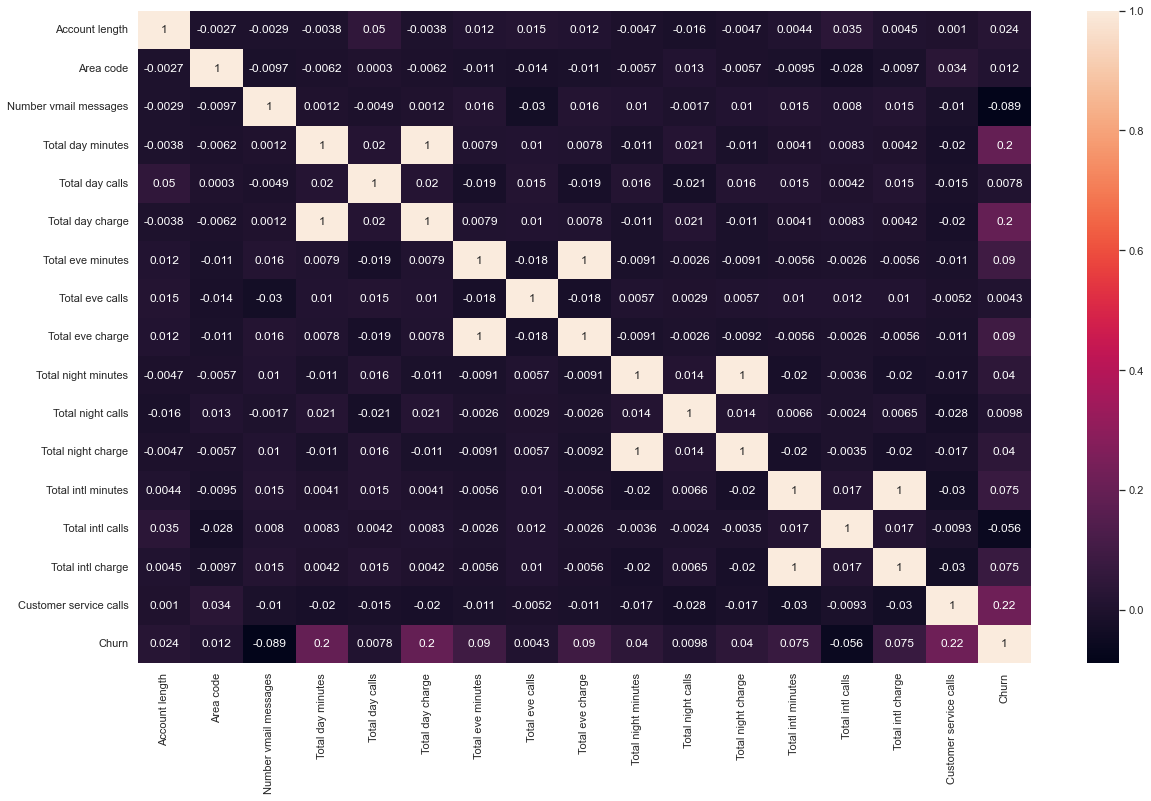

In [236]:
# Check colinearity among data columns
corr = training_data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

In [203]:
# creating dummy values for the categorical values to see the correlation between them
# dropping State column as it has no relevance
dummy_data = pd.get_dummies(training_data, columns=['International plan', 'Voice mail plan'])
dummy_data = dummy_data.drop(['State'], axis=1)
dummy_data.head()
# dummy_data.isna().sum().sum()

Account length  Area code  Number vmail messages  Total day minutes  \
1382             125        415                     39              236.1   
1468              75        510                     27              117.5   
1881              76        415                      0              272.7   
221              127        408                     22              166.0   
3053              82        415                      0              199.3   

      Total day calls  Total day charge  Total eve minutes  Total eve calls  \
1382              107             40.14              289.2              110   
1468              102             19.98              206.8              127   
1881               97             46.36              236.4               95   
221               114             28.22              174.5              103   
3053              112             33.88              193.4              120   

      Total eve charge  Total night minutes  ...  Total night charge  \
1382             24.58                175.4  ...                7.89   
1468             17.58                194.4  ...                8.75   
1881             20.09                235.5  ...               10.60   
221              14.83                244.9  ...               11.02   
3053             16.44                254.4  ...               11.45   

      Total intl minutes  Total intl calls  Total intl charge  \
1382                 9.1                 4               2.46   
1468                 4.2                 7               1.13   
1881                 7.7                 2               2.08   
221                 10.2                 6               2.75   
3053                 7.0                10               1.89   

      Customer service calls  Churn  International plan_No  \
1382                       2      0                      1   
1468                       3      0                      1   
1881                       0      1                      1   
221                        1      0                      1   
3053                       0      0                      1   

      International plan_Yes  Voice mail plan_No  Voice mail plan_Yes  
1382                       0                   0                    1  
1468                       0                   0                    1  
1881                       0                   1                    0  
221                        0                   0                    1  
3053                       0                   1                    0  

[5 rows x 21 columns]

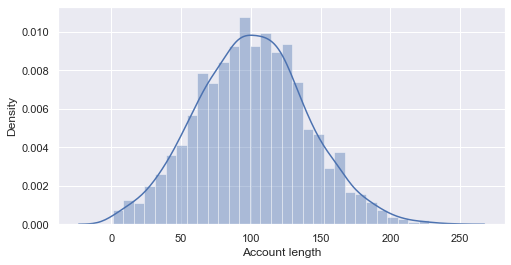

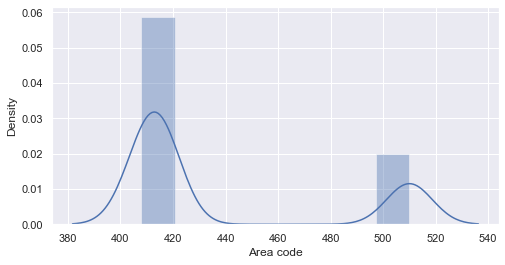

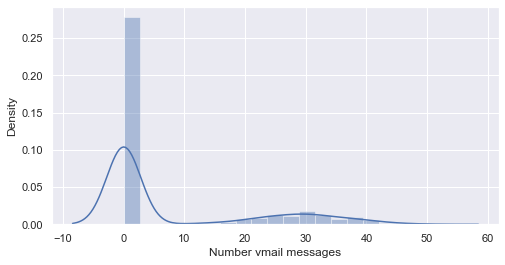

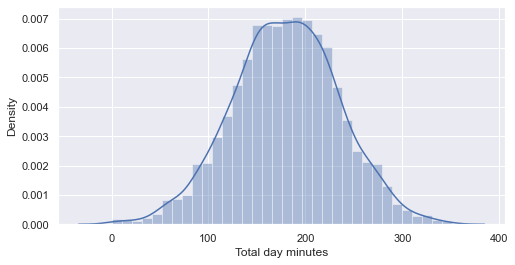

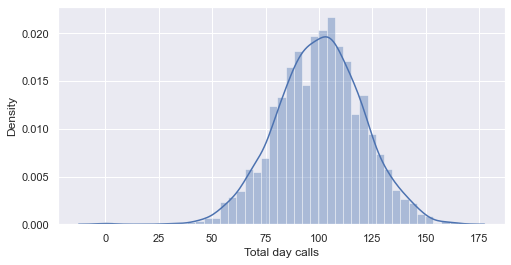

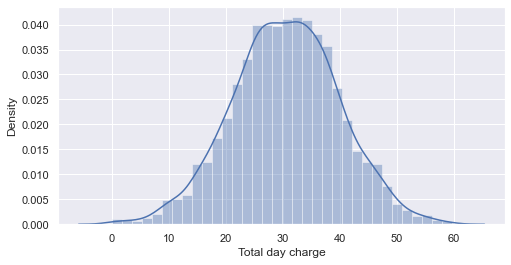

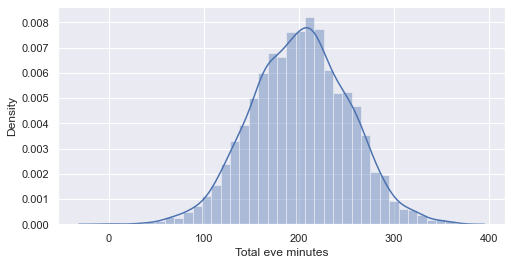

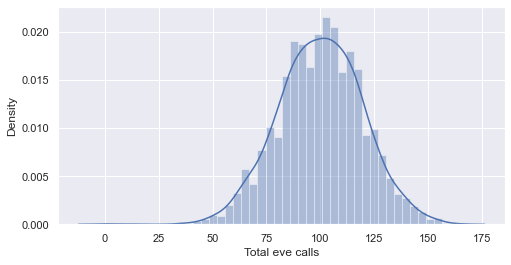

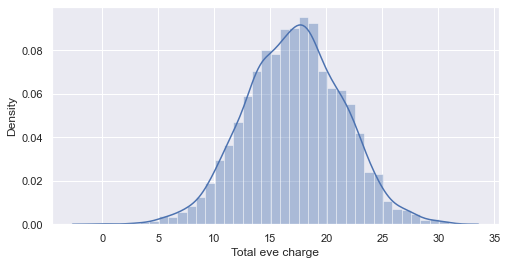

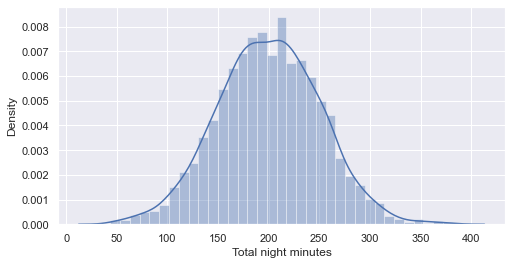

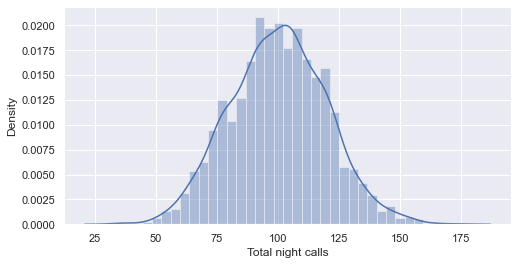

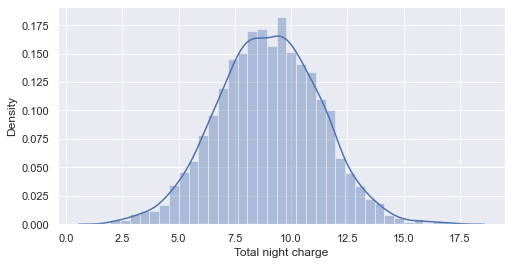

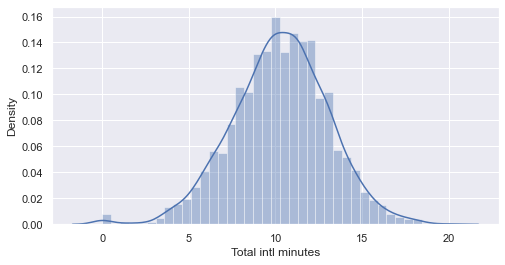

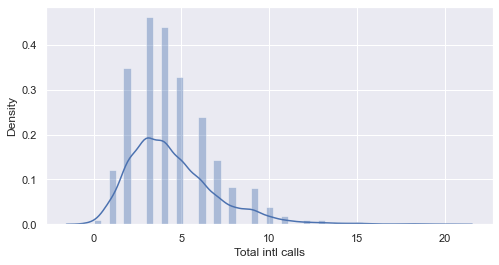

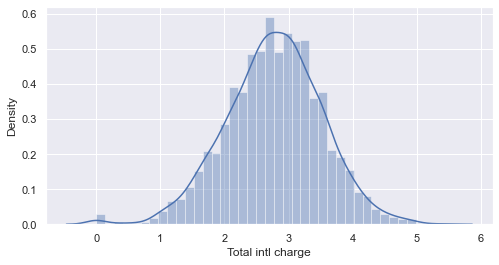

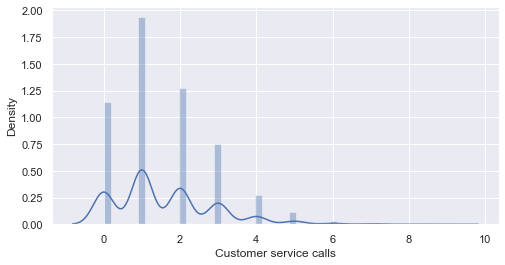

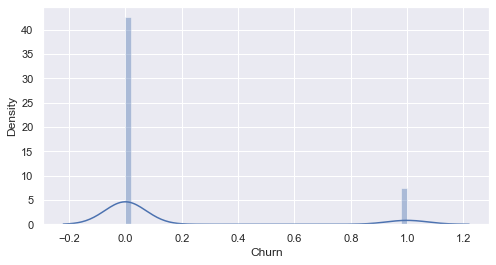

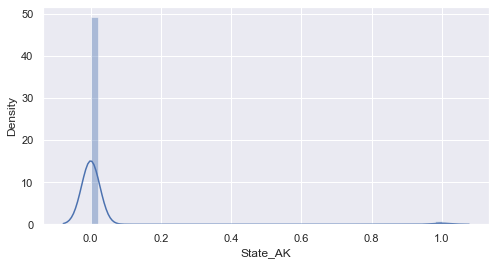

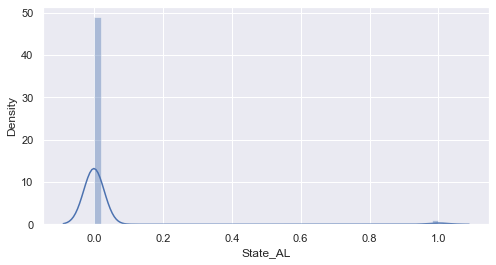

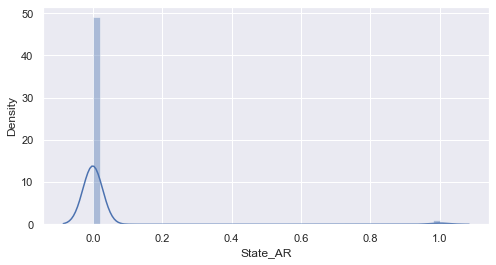

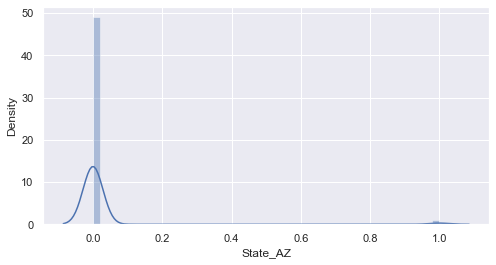

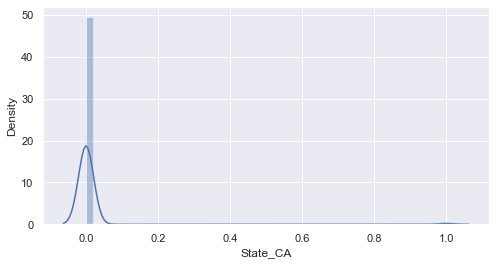

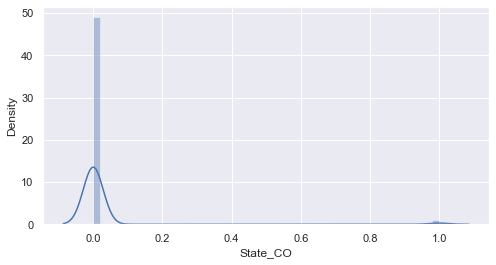

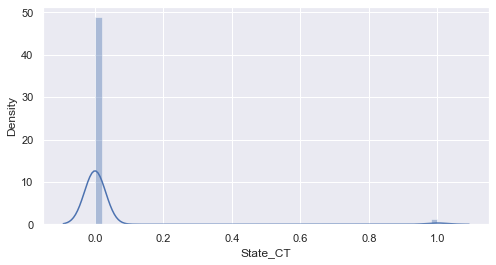

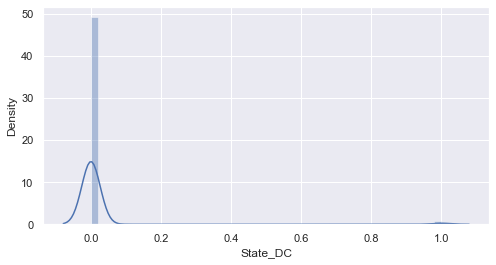

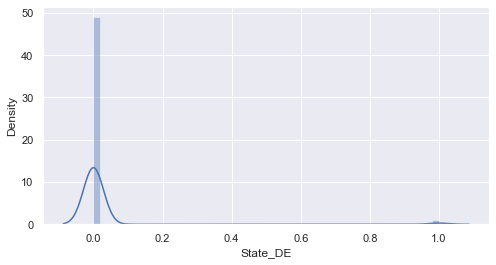

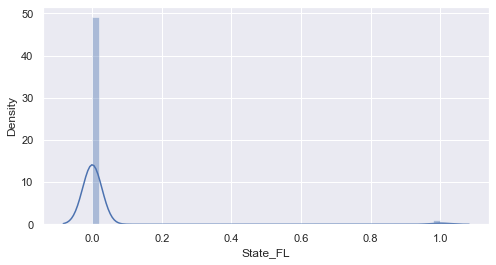

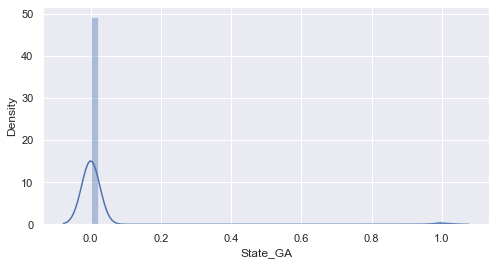

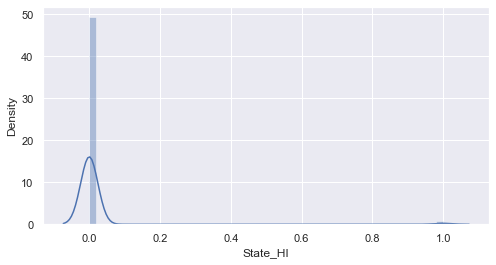

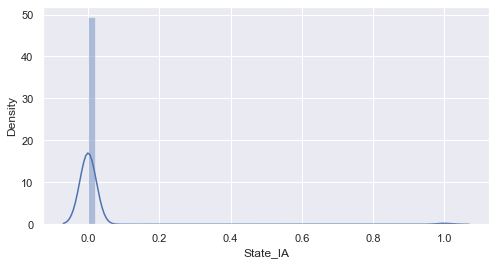

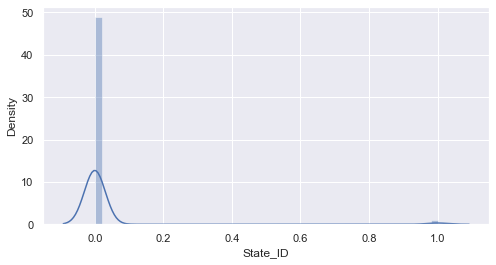

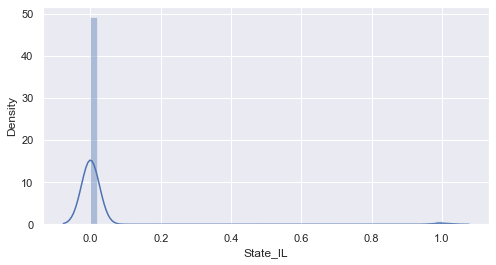

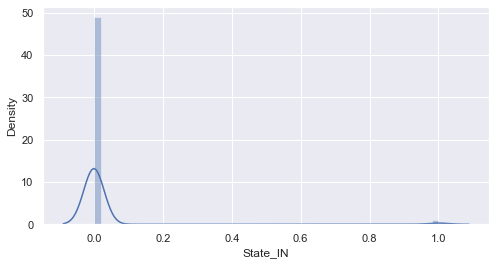

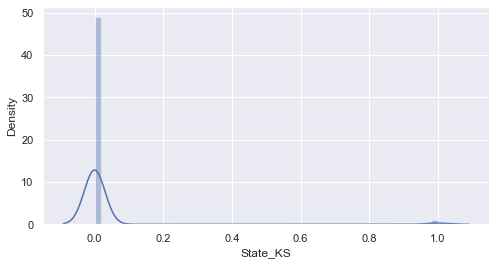

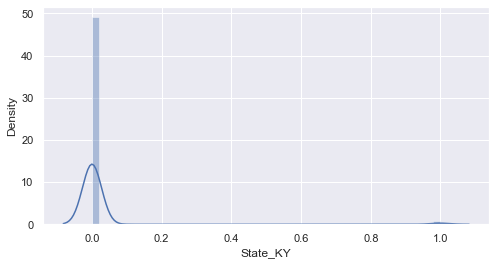

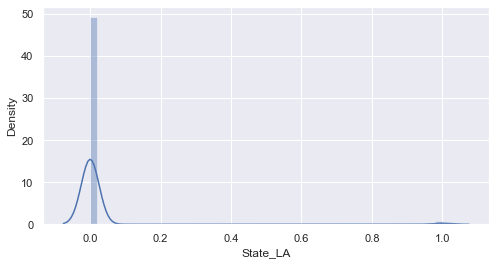

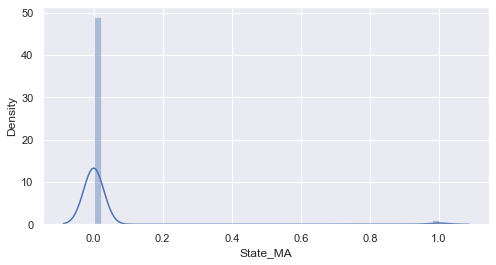

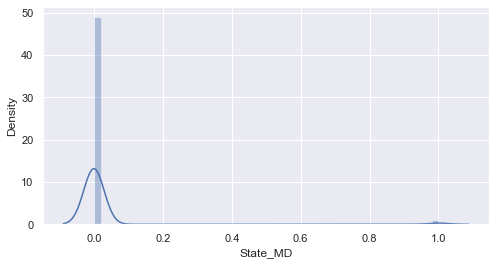

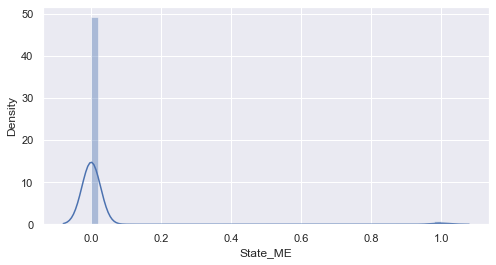

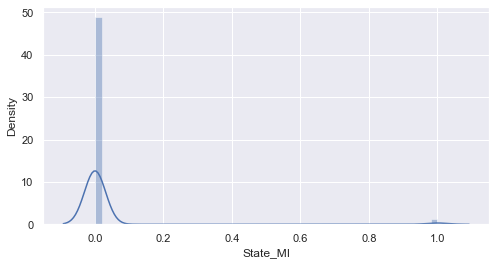

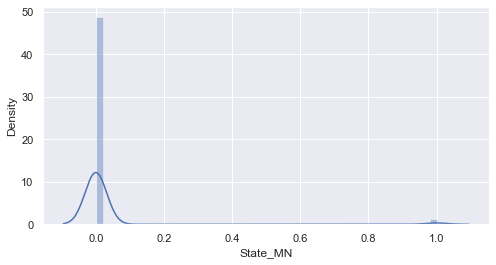

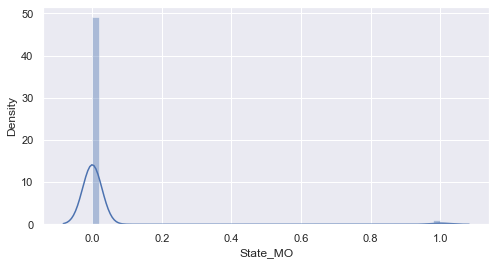

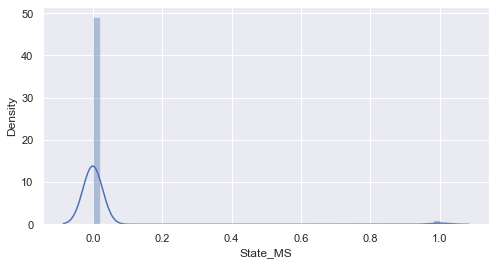

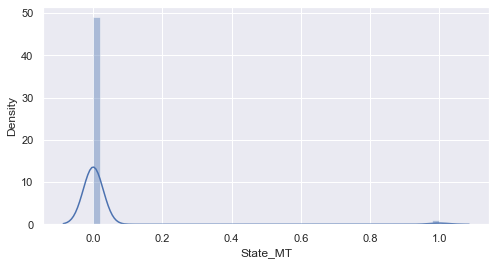

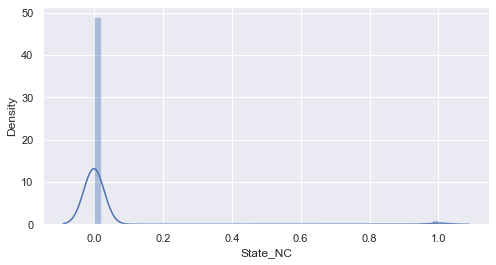

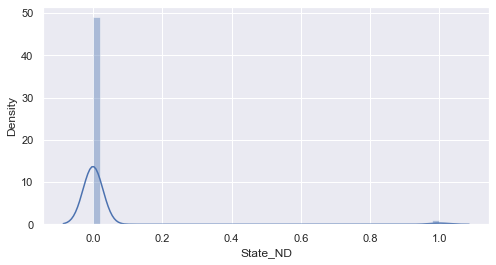

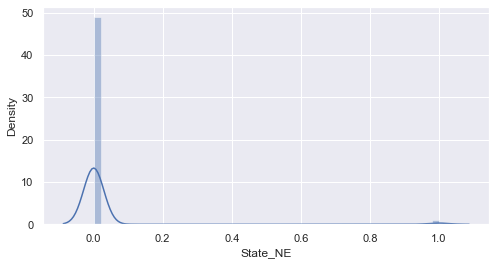

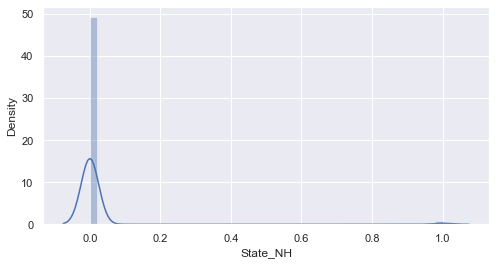

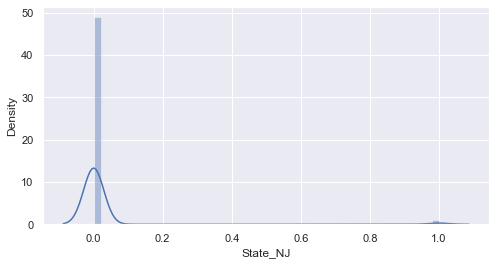

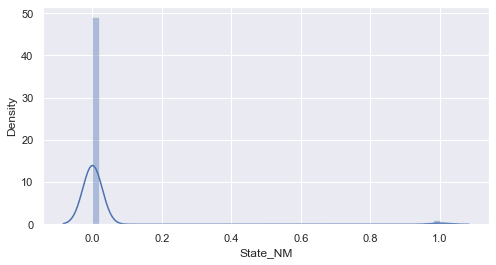

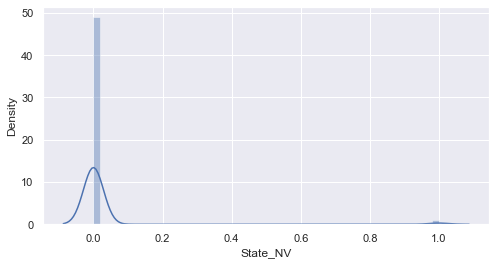

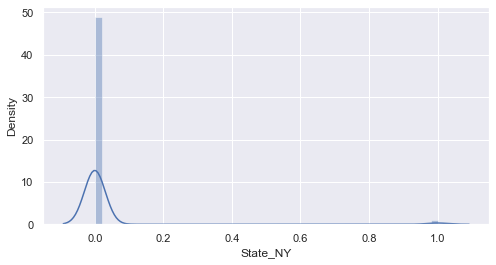

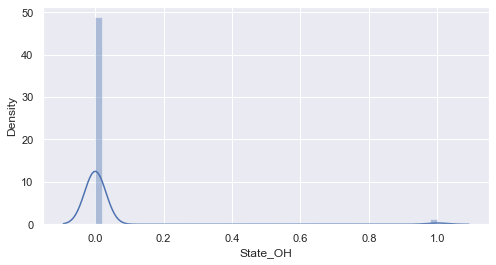

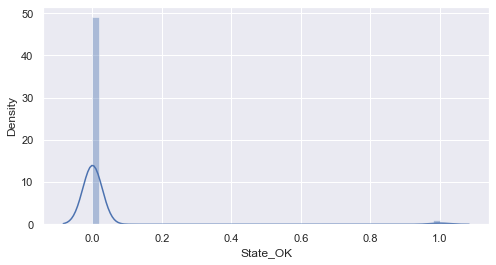

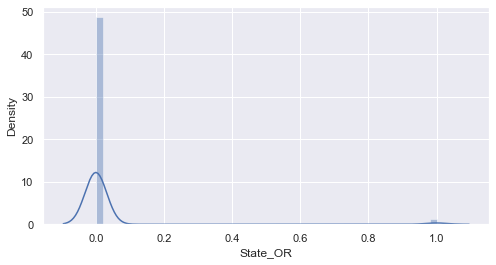

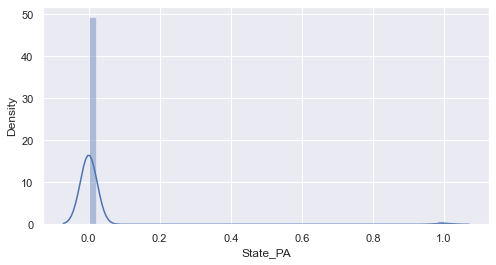

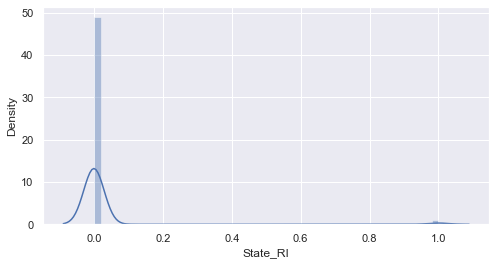

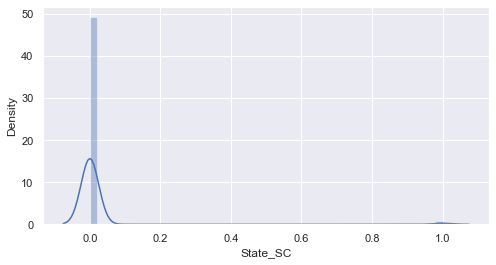

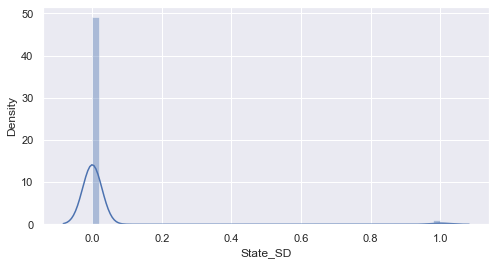

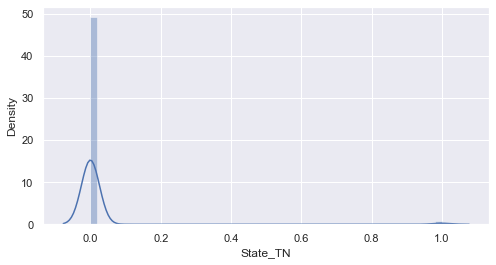

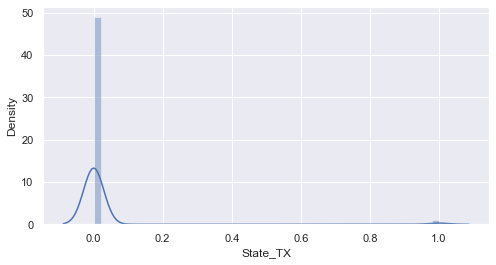

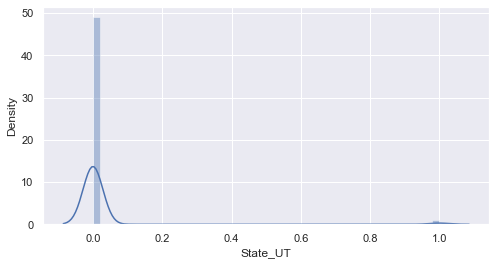

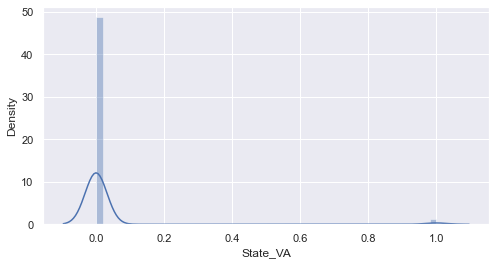

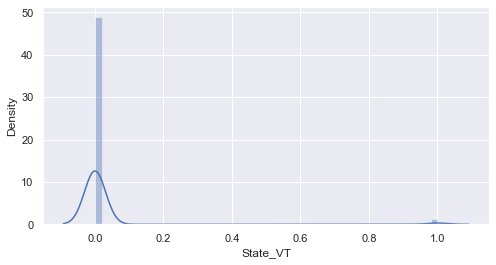

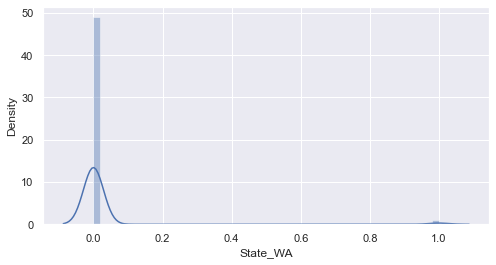

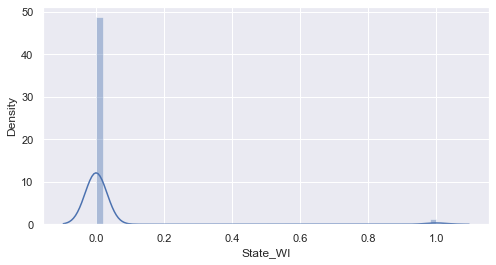

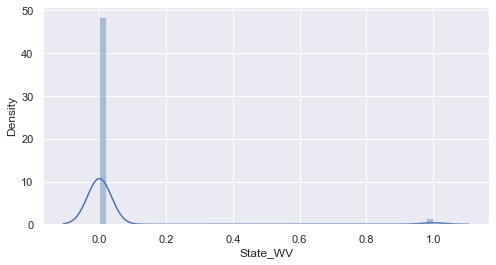

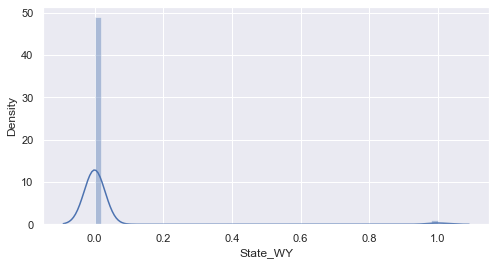

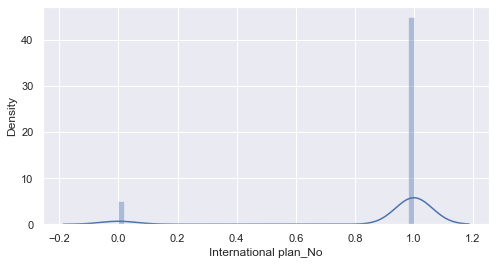

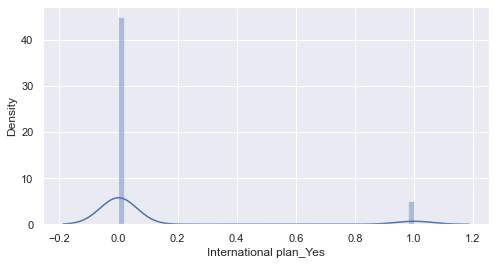

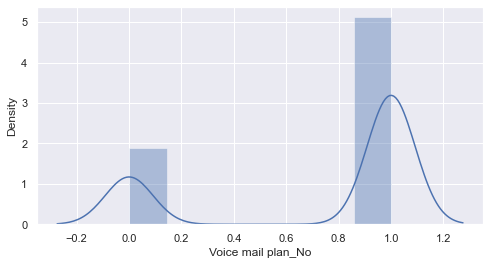

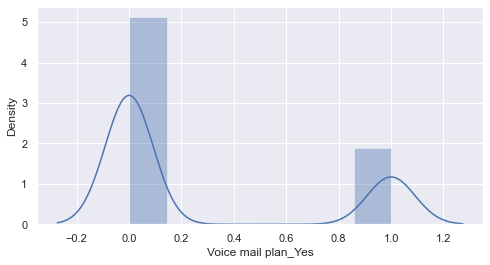

In [149]:
# Plotting graphs for categorical values (State, International plan, Voice mail plan)
categorical_fields = dummy_data.columns
for column in categorical_fields:
    sns.set(rc={"figure.figsize": (8, 4)});
    sns.distplot(dummy_data[column])
    plt.show()

1. From the above Dist plots, it appears that all the independent variables are roughly following normal distribution.<br>
2. There are few outliers in few predictors like Number of Voice mails, International plan and Voice mail plan.<br>
3. We can discard State's columns as they are not giving us any significant data values. Every state has shown mostly normal distribution with 0 churn data<br>
4. To check the predictors we mentioned have few outliers we need to check the correlation between them and there significance on the client's churn

### Feature Selection Process
Now that we have our dummy data ready, we can start working on Feature selection techniques, and for that we going to use 3 different ways  to find Features:<br>
1. Pearson's correlation<br>
2. K Best features<br>
3. Sequential feature selection<br>
<br>

#### Pearson's Correlation
The Pearson's correlation measures the strength of linear relationship between 2 variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation and +1 meaning a total positive correlation.<br>

#### K Best features
The SelectKBest method select the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data.Selecting best features is important process when we prepare a large dataset for training.<br>

#### Sequential feature selection
This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. 

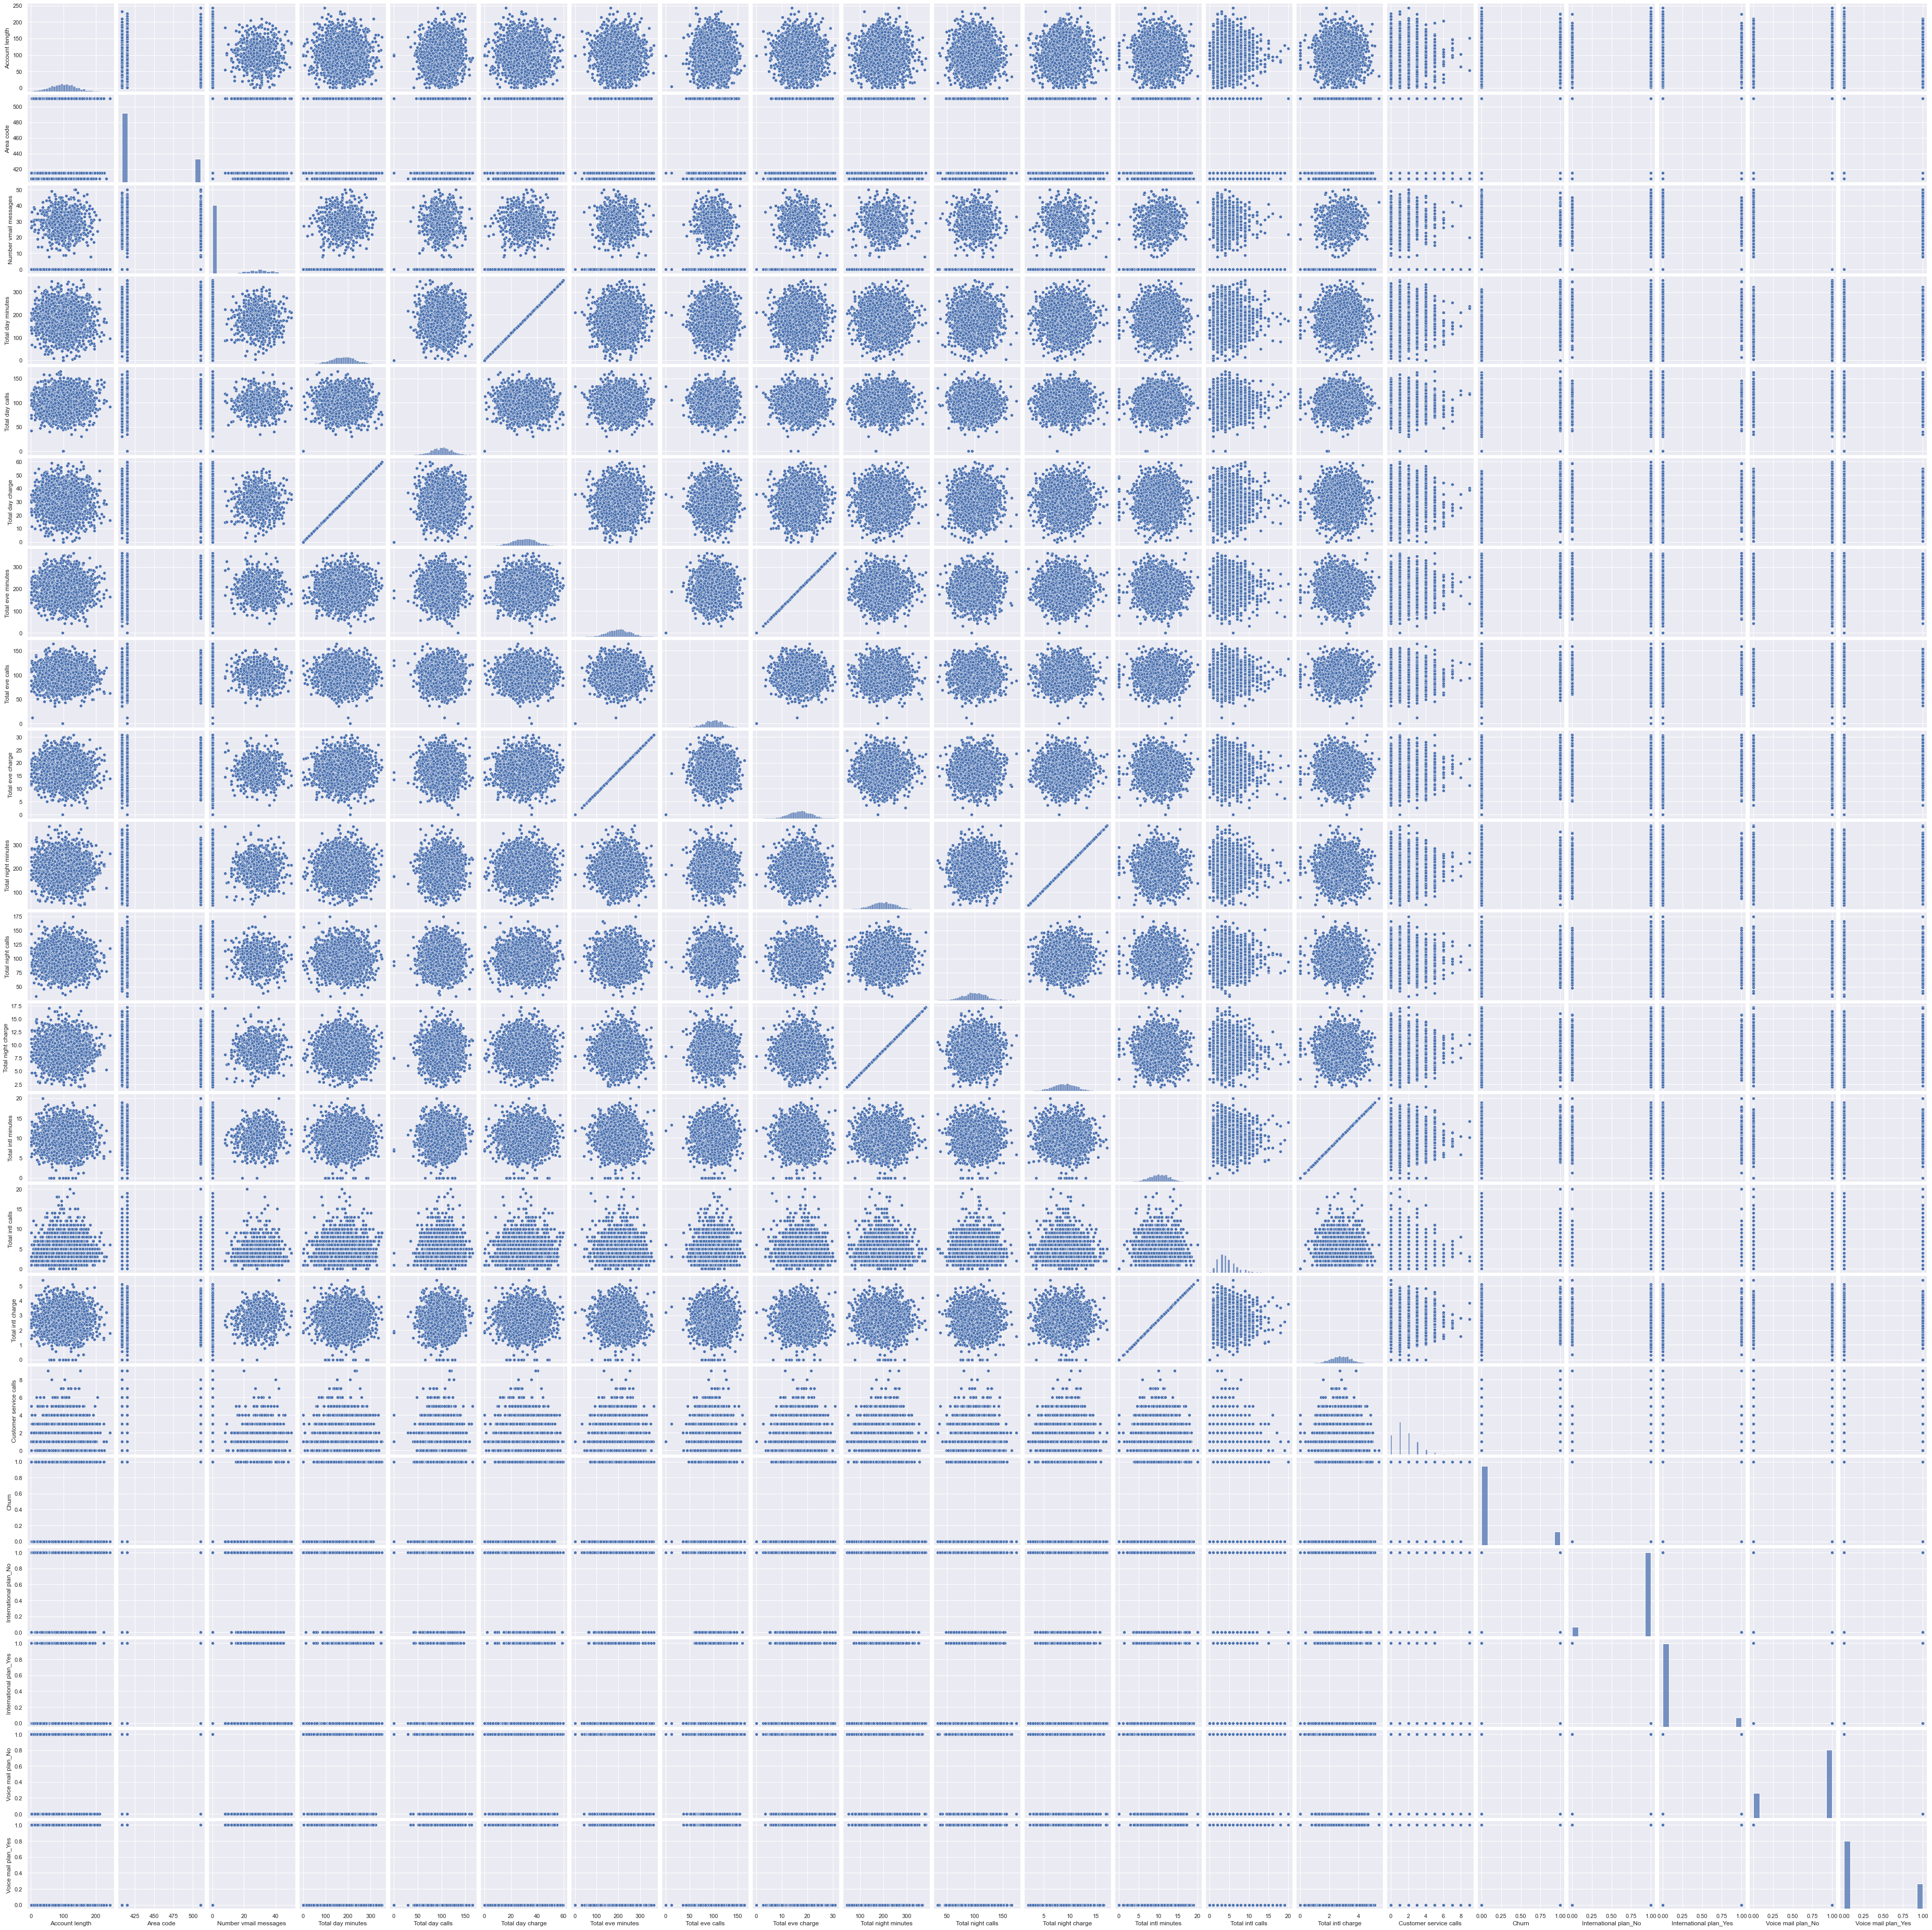

In [152]:
# Now we check the colinearity between the columns
sns.pairplot(dummy_data)

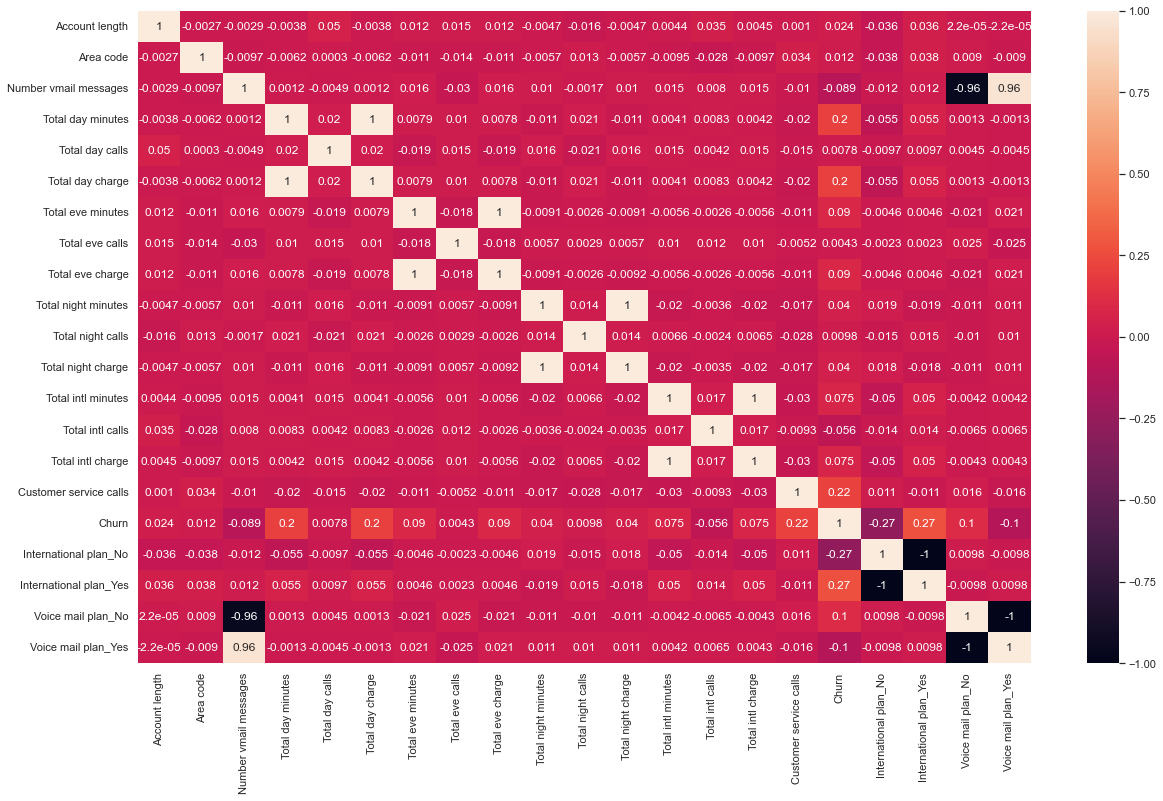

In [237]:
corr = dummy_data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

In [154]:
# Dependency correlation with Churn column
dummy_data.corr()['Churn'].sort_values(ascending=False)

Churn                     1.000000
International plan_Yes    0.268827
Customer service calls    0.217403
Total day charge          0.195553
Total day minutes         0.195552
Voice mail plan_No        0.103167
Total eve minutes         0.089744
Total eve charge          0.089728
Total intl charge         0.074992
Total intl minutes        0.074939
Total night charge        0.039569
Total night minutes       0.039554
Account length            0.023708
Area code                 0.012434
Total night calls         0.009808
Total day calls           0.007758
Total eve calls           0.004324
Total intl calls         -0.055601
Number vmail messages    -0.089303
Voice mail plan_Yes      -0.103167
International plan_No    -0.268827
Name: Churn, dtype: float64

Through the above Heat map and Correlation matrix we can conclude the following observations:<br>
1. International plan_Yes is the highest correlated data point which can be used one of the most important predictor variable.<br>
2. There is high correlation between Total day charge and Total day minutes and as we can see in the above matrix, Total day minutes have higher correlation, so we can discard the Total day charge.<br>
3. Similarly, we can discard Total eve charge and keep Total eve minutes as both are highly correlated to each other.<br>
4. Also, we can discard Total intl minutes and keep Total intl charge.<br>
5. And we can discard Total night minutes and keep Total night charge.<br>
6. We have high correlation between Voice mail plan and Number vmail messages, so we can select only one column, so we are using Voice mail plan_No as it has higher correlation.

In [170]:
"""
Now we gonna clean our final training dataset by dropping the columns which are not correlated in any case
or which were overlapping as pointed out in above observation
and get the clean features that will define our Learning Model
"""
columns_to_drop = [
    'Account length',
    'Area code',
    'International plan_No',
    'Voice mail plan_Yes',
    'Total day charge',
    'Total eve charge',
    'Total intl minutes',
    'Total night minutes',
    'Number vmail messages',
    'Total night charge',
    'Total eve minutes',
    'Total intl charge',
    'Total day calls',
    'Total eve calls',
    'Total night calls',
    'Total intl calls'
]
dummy_data_with_corr = dummy_data.drop(columns_to_drop, axis=1)
dummy_data_with_corr.head()

Total day minutes  Customer service calls  Churn  \
1382              236.1                       2      0   
1468              117.5                       3      0   
1881              272.7                       0      1   
221               166.0                       1      0   
3053              199.3                       0      0   

      International plan_Yes  Voice mail plan_No  
1382                       0                   0  
1468                       0                   0  
1881                       0                   1  
221                        0                   0  
3053                       0                   1

In [171]:
dummy_data_with_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1382 to 1338
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total day minutes       2666 non-null   float64
 1   Customer service calls  2666 non-null   int64  
 2   Churn                   2666 non-null   int64  
 3   International plan_Yes  2666 non-null   uint8  
 4   Voice mail plan_No      2666 non-null   uint8  
dtypes: float64(1), int64(2), uint8(2)
memory usage: 153.1 KB


#### Through Pearson's Correlation we got the following output:
Columns shown in above table are the features that we are gonna use to predict the customer behaviour

#### Now we find the features through KBest
The algorithm is simple: we simply provide a method of calculating the importance of a feature and the number of features we want to use, denoted as k. Then, the algorithm simply returns the top k features.<br>
The main advantage of this method is that we are free to choose among a variety of ways to compute the importance of a feature.<br>
Here, we use the chi squared test, as we are working with a classification task.

In [231]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier(random_state=42)

# First we make dummy data from original data
dummy_data_v2 = pd.get_dummies(data, columns=['International plan', 'Voice mail plan'])
dummy_data_v2 = dummy_data_v2.drop(['State'], axis=1)

# Make Testing and Training Data
X = dummy_data_v2.drop(['Churn'], axis=1)
y = dummy_data_v2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=42)
# Make copy of this Test Data
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

f1_score_list = []

for k in range(1, 20):
    selector = SelectKBest(chi2, k=k)
    selector.fit(X_train_v1, y_train_v1)
    
    sel_X_train_v1 = selector.transform(X_train_v1)
    sel_X_test_v1 = selector.transform(X_test_v1)
    
    dt.fit(sel_X_train_v1, y_train_v1)
    kbest_preds = dt.predict(sel_X_test_v1)
    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)
  
print(f1_score_list)


[0.804, 0.792, 0.795, 0.797, 0.863, 0.886, 0.89, 0.891, 0.877, 0.878, 0.891, 0.894, 0.925, 0.921, 0.918, 0.904, 0.904, 0.91, 0.902]


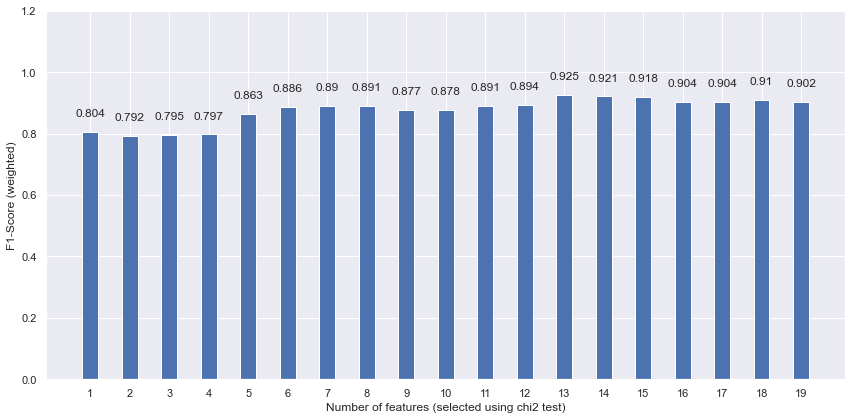

In [232]:
# We can now plot the F1-score for each number of variables used in the model:
fig, ax = plt.subplots(figsize=(12, 6))
x = ['1','2','3','4','5','6','7','8','9','10','11','12','13', '14', '15', '16', '17', '18', '19']
y = f1_score_list
ax.bar(x, y, width=0.4)
ax.set_xlabel('Number of features (selected using chi2 test)')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

The above observation shows that when we use top 13 features then we get the best score which is of 0.925 . But this increases our features dependencies, so let's test with some other test than "chi squared test" to check the validation such as f_classif which returns the number of best features we want, or maybe we get some improved results.

In [233]:
X_new = dummy_data_v2.drop(['Churn'], axis=1)
Y_new = dummy_data_v2['Churn']

# Create and fit selector
selector = SelectKBest(f_classif, k=4)
selector.fit(X_new, Y_new)

# Now selector will take the best featured columns
cols = selector.get_support(indices=True)
new_feature_data = X_new.iloc[:,cols]
print(new_feature_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Total day minutes       3333 non-null   float64
 1   Customer service calls  3333 non-null   int64  
 2   International plan_No   3333 non-null   uint8  
 3   International plan_Yes  3333 non-null   uint8  
dtypes: float64(1), int64(1), uint8(2)
memory usage: 58.7 KB
None


In [235]:
new_feature_data['Churn'] = Y_new
new_feature_data.head()

Total day minutes  Customer service calls  International plan_No  \
0              265.1                       1                      1   
1              161.6                       1                      1   
2              243.4                       0                      1   
3              299.4                       2                      0   
4              166.7                       3                      0   

   International plan_Yes  Churn  
0                       0      0  
1                       0      0  
2                       0      0  
3                       1      0  
4                       1      0

#### Through the KBest features method, we got the following output:
Columns shown in above table are the features that we can use to predict the customer behaviour. The only difference here we got from the Pearson's correlation model is that we decided to drop "International plan_No" column and consider "Voice mail plan_No" as our feature.

In [249]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

X_v2 = dummy_data_v2.drop(['Churn'], axis=1)
y_v2 = dummy_data_v2[['Churn']]
y_v2 = y_v2.values.ravel()

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42, stratify=y_v2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_v2)
X_test = scaler.transform(X_test_v2)


In [250]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features='best',
          forward=True,
          floating=False,
          scoring = 'precision',
          cv = 0)
sfs.fit(X_v2, y_v2)
sfs.k_feature_names_ 

('Total day minutes',)

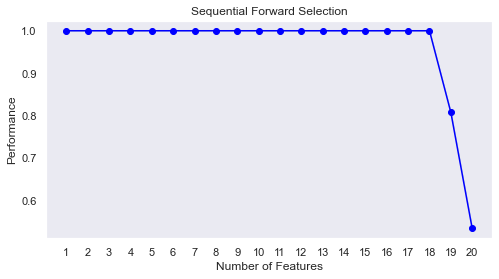

In [252]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

#### Through the SequentialFeatureSelector features method, we got the following output:
This method provided just 1 column to be more relevant to our Learning model i.e. Total day minutes

## Indentifying predictor Significance

In [254]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(dummy_data['Churn'], dummy_data[['Total day minutes', 'Customer service calls', 'International plan_No', 'International plan_Yes']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           5.61e-97
Time:                        09:53:46   Log-Likelihood:                -801.87
No. Observations:                2666   AIC:                             1612.
Df Residuals:                    2662   BIC:                             1635.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Total day minutes          0.0012      0.000     10.409      0.000       0.001       0.001
Customer service calls     0.0602      0.005     12.562      0.000       0.051       0.070
International plan_No     -0.1946      0.023     -8.396      0.000      -0.240      -0.149
International plan_Yes     0.1130      0.031      3.697      0.000       0.053       0.173
==============================================================================
Omnibus:                      674.830   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1336.406
Skew:                           1.534   Prob(JB):                    6.35e-291
Kurtosis:                       4.617   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### As we have a classification problem, So we are going to use Logistic Regression

In [258]:
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_v2, y_train_v2)

# logisticRegr.predict(X_test_v2.reshape(1,-1))

KeyError: 0